# Data set

The data was splitted into 3 parts: numerical, categorical, date stamps. 

There are 968 numerical features, 2140 categorical features and 1156 date features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

                File     Rows  Columns     Error
0      train_numeric  1183747      970  0.005845
1         train_date  1183747     1157  0.000000
2  train_categorical  1183747     2141  0.000000
3       test_numeric  1183748      969  0.000000
4          test_date  1183748     1157  0.000000
5   test_categorical  1183748     2141  0.000000


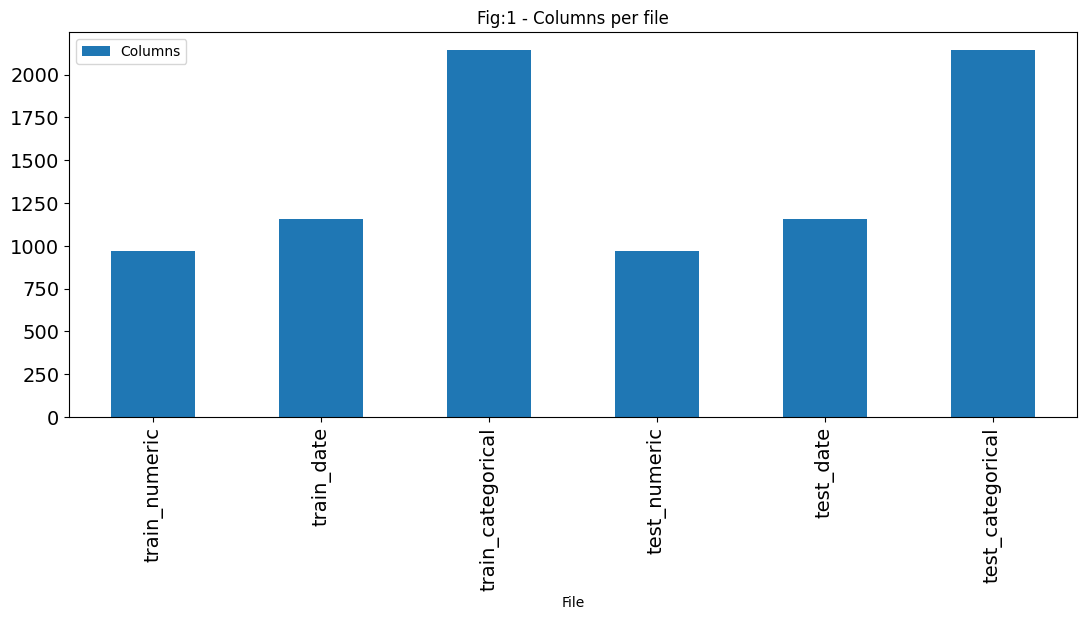

In [2]:
INPUT_PATH = "/Users/maguoyi/Downloads/bosch-production-line-performance/%s.csv.zip"

def get_failure_rate(file_name):
    # will calculate the error rate from data on the file based on response col
    # Respons: 1 = Failed QC , 0 = Passed QC
    rows = pd.read_csv(INPUT_PATH % file_name, usecols=["Response"])
    failure_rate = rows[rows.Response == 1].size / float(rows[rows.Response == 0].size)
    return failure_rate


def explore_data_size():
    # explore the size (rows, cols) of each file
    data_files = ['train_numeric', 'train_date', 'train_categorical', 'test_numeric',
                  'test_date', 'test_categorical']
    stats = []
    for file_name in data_files:
        cols = pd.read_csv(INPUT_PATH % file_name, nrows=1)
        rows = pd.read_csv(INPUT_PATH % file_name, usecols=["Id"])
        stats.append({'File': file_name, 'Rows': rows.shape[0], 'Columns': cols.shape[1]})
    # convert the result into a DataFrame so we can do plotting.
    df = pd.DataFrame(stats, columns=["File", "Rows", "Columns"])
    failure_rate = get_failure_rate('train_numeric')
    df["Error"] = 0
    df.loc[df.File == 'train_numeric', 'Error'] = failure_rate
    return df
    

res = explore_data_size()
res.plot(kind='bar', x='File', y='Columns', title="Fig:1 - Columns per file",
         figsize=(13,5), fontsize=14)
print(res)

##  1. Categorical features

In [1]:

import collections 
data=pd.read_csv("/Users/maguoyi/Downloads/bosch-production-line-performance/train_categorical.csv.zip",chunksize=100000, dtype=str,usecols=list(range(1,2141)))
uniques = collections.defaultdict(set)


for chunk in data: 
    for col in chunk:
        uniques[col] = uniques[col].union(chunk[col][chunk[col].notnull()].unique())

### 1.1 Are any categorical features empty?

In [2]:
empty=0
for key in uniques:
    if len(uniques[key])==0:
        print(key)
        empty=empty+1

L0_S3_F69
L0_S3_F71
L0_S3_F73
L0_S3_F75
L0_S3_F77
L0_S3_F79
L0_S3_F81
L0_S3_F83
L0_S3_F85
L0_S3_F87
L0_S3_F89
L0_S3_F91
L0_S3_F93
L0_S3_F95
L0_S3_F97
L0_S3_F99
L0_S3_F101
L0_S3_F103
L0_S18_F436
L0_S18_F438
L0_S18_F440
L0_S18_F442
L0_S18_F443
L0_S18_F445
L0_S18_F446
L0_S18_F448
L0_S18_F450
L0_S18_F452
L0_S23_F616
L0_S23_F618
L0_S23_F620
L0_S23_F622
L0_S23_F624
L0_S23_F626
L0_S23_F628
L0_S23_F630
L0_S23_F632
L0_S23_F634
L0_S23_F636
L0_S23_F638
L0_S23_F640
L0_S23_F642
L0_S23_F644
L0_S23_F646
L0_S23_F648
L0_S23_F650
L0_S23_F652
L0_S23_F654
L0_S23_F656
L0_S23_F658
L0_S23_F660
L0_S23_F662
L0_S23_F664
L0_S23_F666
L0_S23_F668
L0_S23_F670
L0_S23_F672
L0_S23_F674
L1_S24_F676
L1_S24_F678
L1_S24_F680
L1_S24_F682
L1_S24_F684
L1_S24_F686
L1_S24_F688
L1_S24_F690
L1_S24_F692
L1_S24_F694
L1_S24_F1157
L1_S24_F1159
L1_S24_F1160
L1_S24_F1167
L1_S24_F1169
L1_S24_F1177
L1_S24_F1179
L1_S24_F1181
L1_S24_F1183
L1_S24_F1561
L1_S24_F1563
L1_S24_F1564
L1_S24_F1673
L1_S24_F1676
L1_S24_F1677
L1_S24_F1680
L1_S24_F16

### 1.2 Are any categorical features single valued?

In [3]:
single=0
for key in uniques:
    if len(uniques[key])==1:
        print(key,uniques[key])
        single=single+1

L0_S1_F25 {'T1'}
L0_S1_F27 {'T9'}
L0_S1_F29 {'T1'}
L0_S2_F33 {'T1'}
L0_S2_F37 {'T1'}
L0_S2_F41 {'T1'}
L0_S2_F45 {'T1'}
L0_S2_F49 {'T1'}
L0_S2_F53 {'T1'}
L0_S2_F57 {'T1'}
L0_S2_F61 {'T1'}
L0_S2_F65 {'T1'}
L0_S4_F105 {'T1'}
L0_S4_F107 {'T1'}
L0_S4_F110 {'T1'}
L0_S4_F112 {'T1'}
L0_S4_F113 {'T98'}
L0_S6_F119 {'T1'}
L0_S6_F121 {'T16'}
L0_S6_F123 {'T1'}
L0_S6_F125 {'T16'}
L0_S6_F126 {'T1'}
L0_S6_F128 {'T16'}
L0_S6_F129 {'T1'}
L0_S6_F131 {'T16'}
L0_S6_F133 {'T1'}
L0_S6_F135 {'T16'}
L0_S9_F151 {'T1'}
L0_S9_F153 {'T1'}
L0_S9_F156 {'T1'}
L0_S9_F158 {'T1'}
L0_S9_F161 {'T1'}
L0_S9_F163 {'T1'}
L0_S9_F166 {'T1'}
L0_S9_F168 {'T1'}
L0_S9_F171 {'T1'}
L0_S9_F173 {'T1'}
L0_S9_F176 {'T1'}
L0_S9_F178 {'T1'}
L0_S9_F181 {'T1'}
L0_S9_F183 {'T1'}
L0_S9_F186 {'T1'}
L0_S9_F188 {'T1'}
L0_S9_F191 {'T1'}
L0_S9_F193 {'T1'}
L0_S9_F196 {'T1'}
L0_S9_F198 {'T1'}
L0_S9_F201 {'T1'}
L0_S9_F203 {'T1'}
L0_S9_F206 {'T1'}
L0_S9_F208 {'T1'}
L0_S9_F211 {'T1'}
L0_S9_F213 {'T1'}
L0_S10_F215 {'T1'}
L0_S10_F217 {'T1'}
L0_S10_F220 {'

### 1.3 Are any categorical features multi-valued?

In [4]:
multi=0
for key in uniques:
    if len(uniques[key])>10:
        print(key,uniques[key])
        multi=multi+1

L0_S9_F154 {'T48576', 'T16777232', 'T16777557', 'T4', 'T96', 'T6553', 'T32', 'T65536', 'T16', 'T512', 'T16779428', 'T12582912', 'T16777472', 'T8', 'T16777248', 'T128', 'T33554448', 'T-18748192', 'T48'}
L0_S9_F159 {'T33554448', 'T48576', 'T16777232', 'T16777557', 'T12582912', 'T16777472', 'T4', 'T32', 'T8', 'T16777248', 'T128', 'T512', 'T16', 'T16779428', 'T48'}
L0_S9_F164 {'T48576', 'T16777232', 'T16777557', 'T4', 'T96', 'T6553', 'T32', 'T65536', 'T16', 'T512', 'T16779428', 'T12582912', 'T16777472', 'T8', 'T16777248', 'T128', 'T33554448', 'T48'}
L0_S9_F169 {'T48576', 'T16777232', 'T16777557', 'T4', 'T96', 'T32', 'T16', 'T512', 'T16779428', 'T12582912', 'T16777472', 'T8', 'T16777248', 'T128', 'T33554448', 'T48'}
L0_S9_F174 {'T48576', 'T16777232', 'T16777557', 'T4', 'T96', 'T6553', 'T32', 'T65536', 'T16', 'T512', 'T16779428', 'T12582912', 'T16777472', 'T8', 'T16777248', 'T128', 'T33554448', 'T48'}
L0_S9_F179 {'T33554448', 'T48576', 'T16777232', 'T16777557', 'T12582912', 'T16777472', 'T4'

### 1.4 plot Number of Features in Category Data

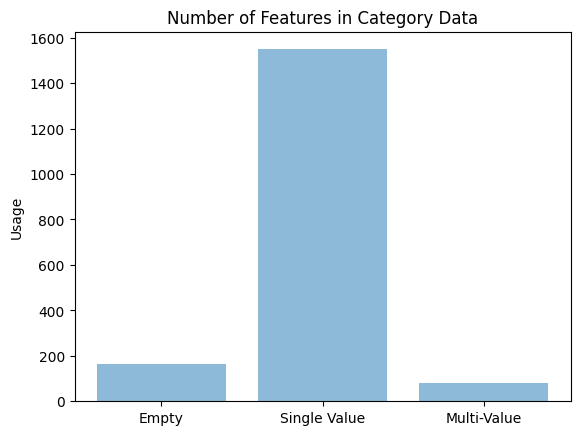

In [5]:
import matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Empty', 'Single Value', 'Multi-Value')
y_pos = np.arange(len(objects))
performance = [empty,single,multi]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Number of Features in Category Data')
 
plt.show()

Thus we can drop the empty columns, and since single values are the most type of values here, we can consider using one-hot encode in the next steps.

## 2. Numerical features

In [5]:
import collections 
data=pd.read_csv("/Users/maguoyi/Downloads/bosch-production-line-performance/train_numeric.csv.zip",chunksize=100000, dtype=str,usecols=list(range(1,970)))
uniques = collections.defaultdict(set)


for chunk in data: 
    for col in chunk:
        uniques[col] = uniques[col].union(chunk[col][chunk[col].notnull()].unique())

In [6]:
empty=0
for key in uniques:
    if len(uniques[key])==0:
        empty=empty+1
single=0

for key in uniques:
    if len(uniques[key])==1:
        print(key,uniques[key])
        single=single+1
multi=0

for key in uniques:
    if len(uniques[key])>10:
        print(key,uniques[key])
        multi=multi+1


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



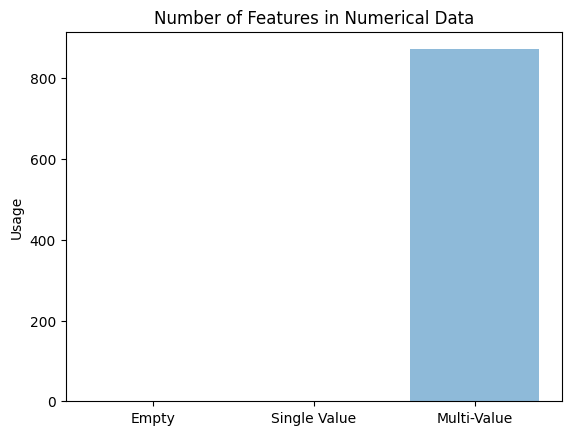

In [7]:
import matplotlib
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('Empty', 'Single Value', 'Multi-Value')
y_pos = np.arange(len(objects))
performance = [empty,single,multi]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Number of Features in Numerical Data')
 
plt.show()

### 2.1 How numerical features were checked in each station?

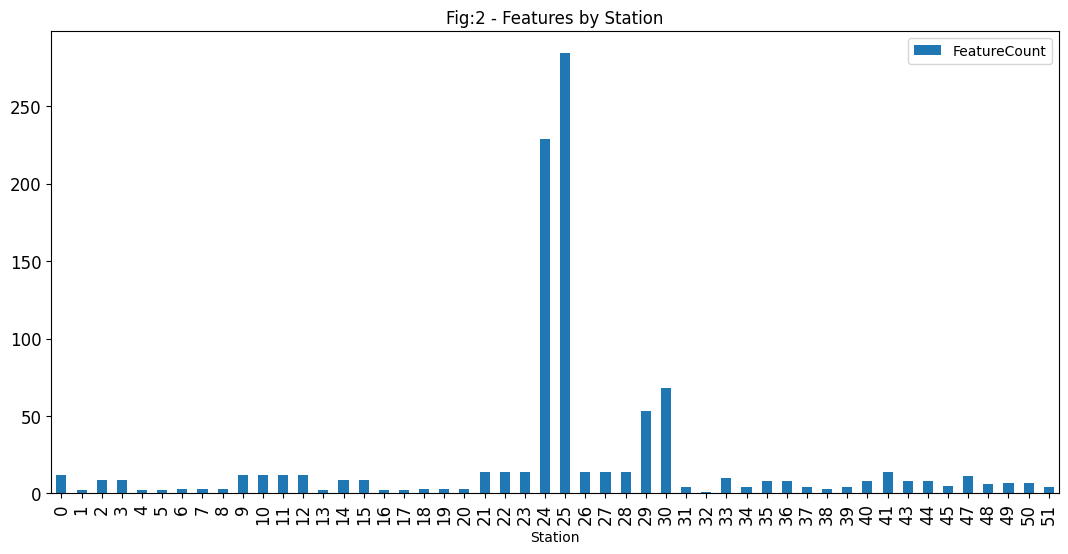

In [9]:
def get_features(feature_list):
    line_features = {}
    station_features = {}
    lines = set([item.split('_')[0] for item in feature_list])
    stations = set([item.split('_')[1] for item in feature_list])

    for l in lines:
        line_features[l] = [item for item in feature_list if '%s_' % l in item]

    for s in stations:
        station_features[s] = [item for item in feature_list if '%s_' % s in item]

    return (line_features, station_features)

def explore_features(data_set_name):
    # how many units processed in each station
    # also percentage of failed/passed QS in each station
    features = pd.read_csv(INPUT_PATH % data_set_name, nrows=1).drop(["Response", "Id"], axis=1).columns.values
    line_features, station_features = get_features(features)
    # create a dataframe cols: station, features_count
    sdf = pd.DataFrame(list({int(key[1:]): len(station_features[key]) for
                             key in station_features.keys()}.items()),
                       columns=["Station", "FeatureCount"])
    sdf_sorted = sdf.sort_values('Station')
    ldf = pd.DataFrame(list({int(key[1:]): len(line_features[key]) for
                             key in line_features.keys()}.items()),
                       columns=["Line", "FeatureCount"])
    
    stations_plot = sdf_sorted.plot(x="Station", y="FeatureCount", kind="bar",
                             title="Fig:2 - Features by Station",
                             figsize=(13,6), fontsize=12)

explore_features("train_numeric")

### 2.2 How many products went through each production line?(fig. 3)

### What's the error rate of each productionline?(fig.4)

/var/folders/43/c6tfq84s00ng8l4bl5r3p7mw0000gn/T/ipykernel_19637/1829671102.py:16: RuntimeWarning: invalid value encountered in divide
  df["Error"] = df.apply(lambda row: float(row["Failed"]) / row["Passed"], axis=1)


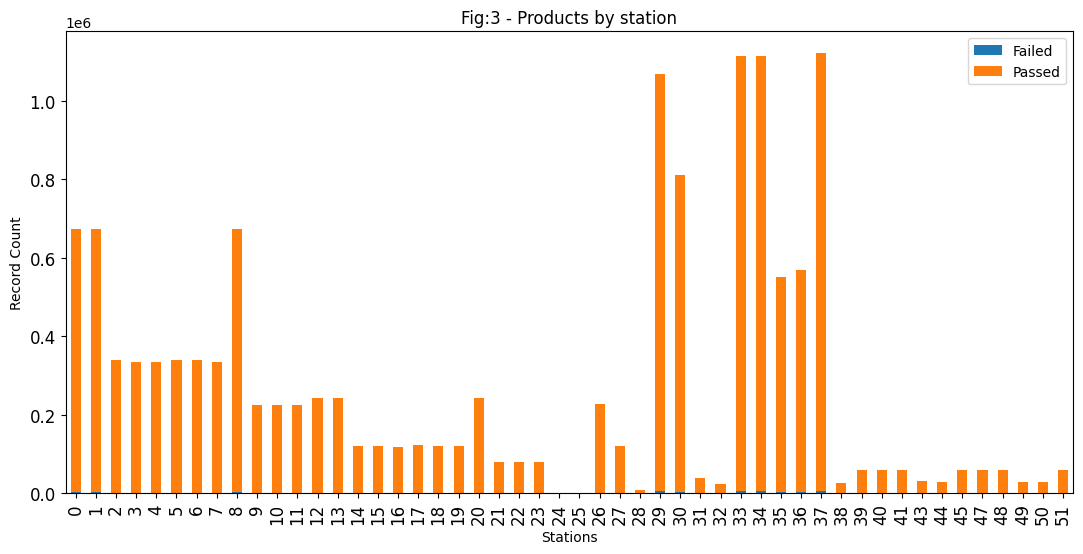

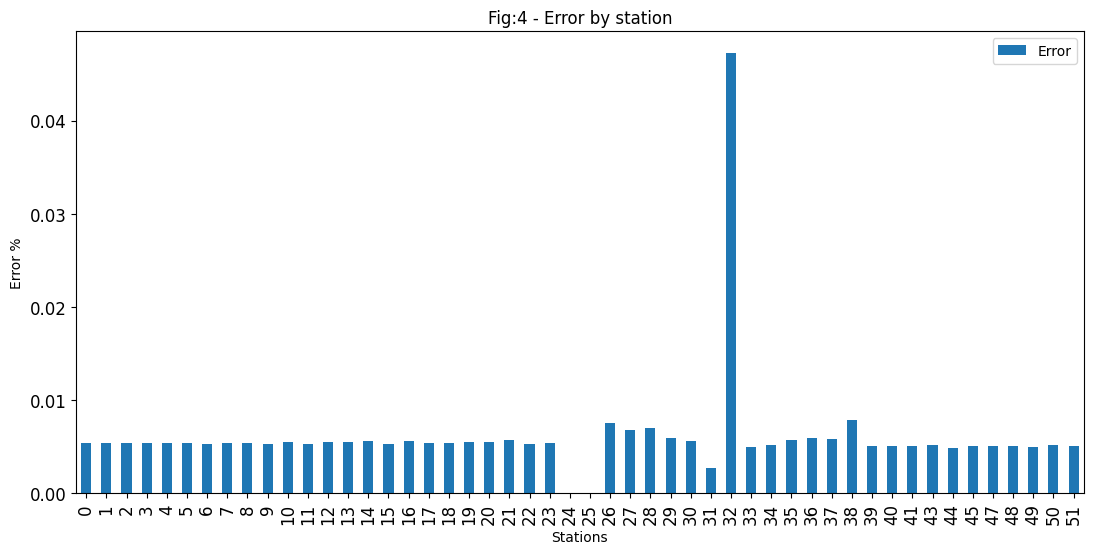

In [10]:
def explore_product_by_station(data_set_name):
    # need to see how many product per station
    features = pd.read_csv(INPUT_PATH % data_set_name, nrows=1).drop(["Response", "Id"], axis=1).columns.values
    line_features, station_features = get_features(features)
    result = []
    for station in station_features:
        station_data = pd.read_csv(
            INPUT_PATH % data_set_name,
            usecols=station_features[station] + ['Id', 'Response']).dropna(how="any")
        result.append([int(station[1:]), station_data.shape[0],
                       station_data[station_data["Response"] == 1].shape[0],
                       station_data[station_data["Response"] == 0].shape[0]])
    df = pd.DataFrame(
        result, columns=["Station", "Count", "Failed", "Passed"]).sort_values(by=["Station"])
    # calculate the error rate for each station
    df["Error"] = df.apply(lambda row: float(row["Failed"]) / row["Passed"], axis=1)
    
    # draw the stacked bar plot tot product/ station
    my_plot = df[["Station", "Failed", "Passed"]].plot(kind="bar", stacked=True, x="Station",
        title="Fig:3 - Products by station", figsize=(13,6), fontsize=12)
    my_plot.set_xlabel("Stations")
    my_plot.set_ylabel("Record Count")
    
    # draw error rate per station
    my_plot = df[["Station", "Error"]].plot(
        kind="bar", x="Station",
        title="Fig:4 - Error by station", figsize=(13,6), fontsize=12)
    my_plot.set_xlabel("Stations")
    my_plot.set_ylabel("Error %")
        
explore_product_by_station("train_numeric")

So what can we say by just looking at the 3 plots above:
Station 24, 25 has by far the most number of features, more than 200 feature per stations! at the same time most of the stations has less than 20 features. And worth noticing that station 32 has only one feature.

Not all stations have the same number of records or product! Does it mean that each product doesn't go through each station? could it be that we have different types of products and each one get processed through different station? Based on my understanding on manufacturing if let's say we are producing Orange Juice, then each juice box will go through the same process and the same machines until the juice is ready. Can someone tell me why the numbers are not equal for all the stations?

The suspicious station 32 has really a minimal number of records. So it doesn't process a lot of products.

Also worth noting that station 32 has by far most of QC failures almost 0.5%. At the same time all of the other stations has less than 0.1% as a failure rate! But wait S32 doesn't process a lot of records, so 0.5% of low number of records is minimal. However if each other station has a failure rate of 0.1% of the total production quantity then this number will add up eventually.